In [1]:
import spacy

In [2]:
import nltk
import benepar
from benepar.spacy_plugin import BeneparComponent
benepar.download('benepar_en')

/home/gaurish/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gaurish/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gaurish/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gaurish/miniconda3/lib/python3.7/site-packages/tensorflow/python/frame

True

In [3]:
from benepar.spacy_plugin import BeneparComponent
spacy.prefer_gpu(0)
nlp = spacy.load('en_core_web_sm',disable=["ner"])
nlp.add_pipe(BeneparComponent('benepar_en'))

In [7]:

from nltk.tree import Tree



def nltk_spacy_tree(sent):
    """
    Visualize the SpaCy dependency tree with nltk.tree
    """
    doc = nlp(sent)
    def token_format(token,index=0):
        return "_".join([token.orth_, token.tag_, token.dep_, str(index)])

    def to_nltk_tree(node,index=0):
        if node.n_lefts + node.n_rights > 0:
            return Tree(token_format(node,index),
                       [to_nltk_tree(child,i) 
                        for i, child in enumerate(node.children)]
                   )
        else:
            return token_format(node,index)

    tree = [to_nltk_tree(sent.root) for sent in doc.sents]
    # The first item in the list is the full tree
    print(tree)
#     tree[0].draw()
    return tree

In [64]:
text ="`` Know then that in the time of the Great Rebellion ( the history of which by the learned Lord Clarendon I most earnestly commend to your attention ) this Manor of Baskerville was held by Hugo of that name , nor can it be gainsaid that he was a most wild , profane , and godless man ."

In [65]:
trees = nltk_spacy_tree(text)


[Tree('held_VBN_ROOT_0', ['`_``_punct_0', Tree('Know_VBP_npadvmod_1', ['`_``_punct_0', 'then_RB_advmod_1', Tree('commend_VBP_ccomp_2', ['that_IN_mark_0', Tree('in_IN_prep_1', [Tree('time_NN_pobj_0', ['the_DT_det_0', Tree('of_IN_prep_1', [Tree('Rebellion_NNP_pobj_0', ['the_DT_det_0', 'Great_NNP_compound_1', '(_-LRB-_punct_2', Tree('history_NN_appos_3', ['the_DT_det_0', Tree('of_IN_prep_1', ['which_WDT_pobj_0']), Tree('by_IN_prep_2', [Tree('Clarendon_NNP_pobj_0', ['the_DT_det_0', 'learned_VBN_amod_1', 'Lord_NNP_compound_2'])])])])])])]), 'I_PRP_nsubj_2', Tree('earnestly_RB_advmod_3', ['most_RBS_advmod_0']), Tree('to_IN_prep_4', [Tree('attention_NN_pobj_0', ['your_PRP$_poss_0'])])]), ')_-RRB-_punct_3']), Tree('Manor_NNP_nsubjpass_2', ['this_DT_det_0', Tree('of_IN_prep_1', ['Baskerville_NNP_pobj_0'])]), 'was_VBD_auxpass_3', Tree('by_IN_agent_4', [Tree('Hugo_NNP_pobj_0', [Tree('of_IN_prep_0', [Tree('name_NN_pobj_0', ['that_DT_det_0'])])])]), ',_,_punct_5', 'nor_CC_cc_6', Tree('gainsaid_JJ_c

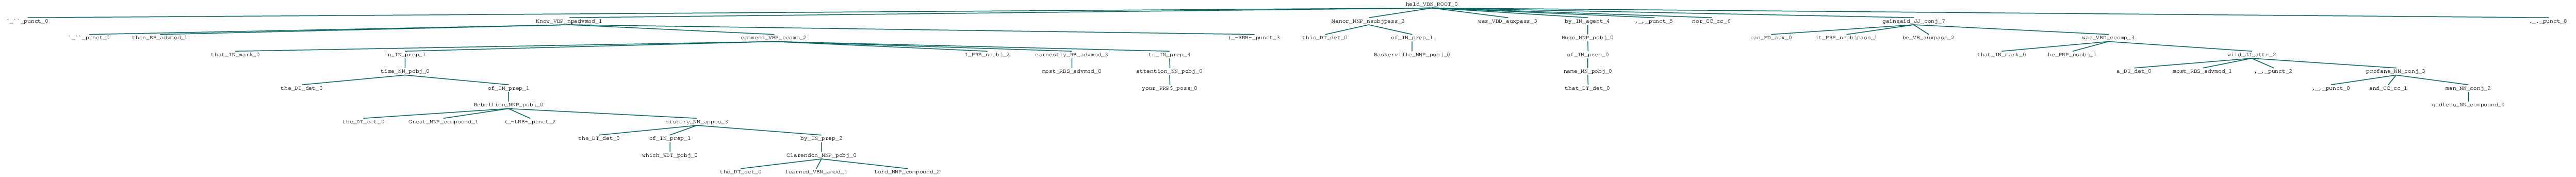

In [66]:
trees[0]

In [68]:
doc = nlp(text)


In [69]:
list(doc.sents)

[`` Know then that in the time of the Great Rebellion ( the history of which by the learned Lord Clarendon I most earnestly commend to your attention ) this Manor of Baskerville was held by Hugo of that name , nor can it be gainsaid that he was a most wild , profane , and godless man .]

In [ ]:
(S (`` ``) (VB Know) (ADVP (RB then)) (SBAR (IN that) (S (IN in) (NP (NP (NP (DT the) (NN time)) (PP (IN of) (NP (DT the) (NNP Great) (NNP Rebellion)))) (PRN (-LRB- -LRB-) (NP (NP (DT the) (NN history)) (SBAR (WHPP (IN of) (WHNP (WDT which))) (S (PP (IN by) (NP (DT the) (VBN learned) (NNP Lord) (NNP Clarendon))) (NP (PRP I)) (VP (ADVP (RBS most) (RB earnestly)) (VBP commend) (PP (IN to) (NP (PRP$ your) (NN attention))))))) (-RRB- -RRB-))))))'

In [71]:
sent = list(doc.sents)[0]
print(sent._.parse_string)
# print(sent._.labels)
# print(list(sent._.children)[0])

(S (`` `) (`` `) (VBP Know) (ADVP (RB then)) (SBAR (IN that) (S (PP (IN in) (NP (NP (DT the) (NN time)) (PP (IN of) (NP (DT the) (NNP Great) (NNP Rebellion))))) (-LRB- -LRB-) (NP (DT the) (NN history)) (WHPP (IN of) (WHNP (WDT which))) (S (S (PP (IN by) (NP (DT the) (VBN learned) (NNP Lord) (NNP Clarendon))) (NP (PRP I)) (VP (ADVP (RBS most) (RB earnestly)) (VBP commend) (PP (PP (IN to) (NP (PRP$ your) (NN attention))) (-RRB- -RRB-)) (S (NP (NP (DT this) (NNP Manor)) (PP (IN of) (NP (NNP Baskerville)))) (VP (VBD was) (VP (VBN held) (PP (IN by) (NP (NP (NNP Hugo)) (PP (IN of) (NP (DT that) (NN name)))))))))) (, ,) (CC nor) (SINV (MD can) (NP (PRP it)) (VP (VB be) (VP (JJ gainsaid) (SBAR (IN that) (S (NP (PRP he)) (VP (VBD was) (NP (DT a) (ADJP (RBS most) (JJ wild) (, ,) (NN profane) (, ,) (CC and) (NN godless)) (NN man))))))))))) (. .))


In [59]:
# for chunk in doc.noun_chunks:
#     print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)
# from nltk.tree import Tree
# s1 = Tree.fromstring(sent._.parse_string)
# print(s1)


In [60]:
from nltk.tree import ParentedTree
ptree = ParentedTree.fromstring(sent._.parse_string)

def traverse(t):
    try:
        t.label()
    except AttributeError:
        return
    else:

        if t.height() == 2:   #child nodes
            print( t.parent())
            return

        for child in t:
            traverse(child)

traverse(ptree)

(NP (DT This) (NN matter))
(NP (DT This) (NN matter))
(VP (VBZ cuts) (ADVP (RB very) (RB deep)))
(ADVP (RB very) (RB deep))
(ADVP (RB very) (RB deep))
(S
  (S
    (NP (DT This) (NN matter))
    (VP (VBZ cuts) (ADVP (RB very) (RB deep))))
  (, ,)
  (CC and)
  (S
    (SBAR
      (IN though)
      (S
        (NP (PRP I))
        (VP
          (VBP have)
          (RB not)
          (ADVP (RB finally))
          (VP
            (VBN made)
            (PRT (RP up))
            (NP (PRP$ my) (NN mind))
            (SBAR
              (IN whether)
              (S
                (NP (PRP it))
                (VP
                  (VBZ is)
                  (NP
                    (NP (DT a) (NN benevolent))
                    (CC or)
                    (NP
                      (NP (DT a) (JJ malevolent) (NN agency))
                      (SBAR
                        (WHNP (WDT which))
                        (S
                          (VP
                            (VBZ is)
          

In [61]:
leaf_values = ptree.leaves()
print(leaf_values)
if 'not' in leaf_values:
    leaf_index = leaf_values.index('not')
    tree_location = ptree.leaf_treeposition(leaf_index)
    print(tree_location)
    print(ptree[tree_location])

['This', 'matter', 'cuts', 'very', 'deep', ',', 'and', 'though', 'I', 'have', 'not', 'finally', 'made', 'up', 'my', 'mind', 'whether', 'it', 'is', 'a', 'benevolent', 'or', 'a', 'malevolent', 'agency', 'which', 'is', 'in', 'touch', 'with', 'us', ',', 'I', 'am', 'conscious', 'always', 'of', 'power', 'and', 'design', '.']
(3, 0, 1, 1, 1, 0)
not


In [62]:
# # for each of the nodes in the set 
# take the negated word and compare it in a window fashion
# if match found reduce the window by half.

In [63]:
 set(ptree[tree_location[:-3]].leaves())

{'I',
 'a',
 'agency',
 'benevolent',
 'finally',
 'have',
 'in',
 'is',
 'it',
 'made',
 'malevolent',
 'mind',
 'my',
 'not',
 'or',
 'touch',
 'up',
 'us',
 'whether',
 'which',
 'with'}

In [102]:
print(ptree[tree_location[:-3]].leaves)

<bound method Tree.leaves of ParentedTree('NP', [ParentedTree('NP', [ParentedTree('RB', ['only']), ParentedTree('DT', ['an']), ParentedTree('JJ', ['unambitious']), ParentedTree('NN', ['one'])]), ParentedTree('SBAR', [ParentedTree('WHNP', [ParentedTree('WP', ['who'])]), ParentedTree('S', [ParentedTree('VP', [ParentedTree('VBZ', ['abandons']), ParentedTree('NP', [ParentedTree('DT', ['a']), ParentedTree('NNP', ['London']), ParentedTree('NN', ['career'])]), ParentedTree('PP', [ParentedTree('IN', ['for']), ParentedTree('NP', [ParentedTree('DT', ['the']), ParentedTree('NN', ['country'])])])])])])])>


In [7]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

If SCONJ mark was
he PRON nsubj was
was AUX advcl been
in ADP prep was
the DET det hospital
hospital NOUN pobj in
and CCONJ cc was
yet ADV advmod on
not PART neg on
on ADP conj was
the DET det staff
staff NOUN pobj on
he PRON nsubj been
could VERB aux been
only ADV advmod been
have AUX aux been
been AUX ROOT been
a DET det surgeon
house NOUN compound surgeon
- PUNCT punct surgeon
surgeon NOUN attr been
or CCONJ cc surgeon
a DET det physician
house NOUN compound physician
- PUNCT punct physician
physician NOUN conj surgeon
-- PUNCT punct been
little ADJ npadvmod more
more ADJ advmod been
than SCONJ prep more
a DET det student
senior ADJ amod student
student NOUN pobj than
. PUNCT punct been


In [8]:
trees = nltk_spacy_tree(text)

NameError: name 'nltk_spacy_tree' is not defined

In [183]:
for i in trees[:-1]:
#     print(i)
    print("\n")
    splitted = str(i)
    splitted = splitted.split()
    flat_tree = ' '.join(splitted)
    print(flat_tree)
    for j in flat_tree.split():
        if j[0]=="(":
            print(j[1:].split("_")[0]) 
        else:
            print(j.split("_")[0] )
    



It_PRP_nsubj_0
It


(experience_NN_attr_1 my_PRP$_poss_0)
experience
my


(is_VBZ_ccomp_2 that_IN_mark_0 it_PRP_nsubj_1 (man_NN_attr_2 only_RB_advmod_0 an_DT_det_1 amiable_JJ_amod_2 (in_IN_prep_3 (world_NN_pobj_0 this_DT_det_0)) (receives_VBZ_relcl_4 who_WP_nsubj_0 testimonials_NNS_dobj_1) ,_,_punct_5 (one_NN_appos_6 only_RB_advmod_0 an_DT_det_1 unambitious_JJ_amod_2 (abandons_VBZ_relcl_3 who_WP_nsubj_0 (career_NN_dobj_1 a_DT_det_0 London_NNP_compound_1 (for_IN_prep_2 (country_NN_pobj_0 the_DT_det_0)))) ,_,_punct_4 and_CC_cc_5 (one_CD_conj_6 only_RB_advmod_0 an_DT_det_1 (minded_JJ_amod_2 absent_JJ_amod_0 -_HYPH_punct_1) (leaves_VBZ_relcl_3 who_WP_nsubj_0 (stick_NN_dobj_1 his_PRP$_poss_0)) and_CC_cc_4 (card_NN_conj_5 not_RB_neg_0 his_PRP$_poss_1 visiting_VBG_amod_2 -_HYPH_punct_3 (after_IN_prep_4 (waiting_VBG_pcomp_0 (hour_NN_dobj_0 an_DT_det_0) (in_IN_prep_1 (room_NN_pobj_0 your_PRP$_poss_0)))))))))
is
that
it
man
only
an
amiable
in
world
this
receives
who
testimonials
,
one
only
an


In [185]:
test = '(is_VBZ_ccomp_2 that_IN_mark_0 it_PRP_nsubj_1 (man_NN_attr_2 only_RB_advmod_0 an_DT_det_1 amiable_JJ_amod_2 (in_IN_prep_3 (world_NN_pobj_0 this_DT_det_0)) (receives_VBZ_relcl_4 who_WP_nsubj_0 testimonials_NNS_dobj_1) ,_,_punct_5 (one_NN_appos_6 only_RB_advmod_0 an_DT_det_1 unambitious_JJ_amod_2 (abandons_VBZ_relcl_3 who_WP_nsubj_0 (career_NN_dobj_1 a_DT_det_0 London_NNP_compound_1 (for_IN_prep_2 (country_NN_pobj_0 the_DT_det_0)))) ,_,_punct_4 and_CC_cc_5 (one_CD_conj_6 only_RB_advmod_0 an_DT_det_1 (minded_JJ_amod_2 absent_JJ_amod_0 -_HYPH_punct_1) (leaves_VBZ_relcl_3 who_WP_nsubj_0 (stick_NN_dobj_1 his_PRP$_poss_0)) and_CC_cc_4 (card_NN_conj_5 not_RB_neg_0 his_PRP$_poss_1 visiting_VBG_amod_2 -_HYPH_punct_3 (after_IN_prep_4 (waiting_VBG_pcomp_0 (hour_NN_dobj_0 an_DT_det_0) (in_IN_prep_1 (room_NN_pobj_0 your_PRP$_poss_0)))))))))'
test.split(" ")

['(is_VBZ_ccomp_2',
 'that_IN_mark_0',
 'it_PRP_nsubj_1',
 '(man_NN_attr_2',
 'only_RB_advmod_0',
 'an_DT_det_1',
 'amiable_JJ_amod_2',
 '(in_IN_prep_3',
 '(world_NN_pobj_0',
 'this_DT_det_0))',
 '(receives_VBZ_relcl_4',
 'who_WP_nsubj_0',
 'testimonials_NNS_dobj_1)',
 ',_,_punct_5',
 '(one_NN_appos_6',
 'only_RB_advmod_0',
 'an_DT_det_1',
 'unambitious_JJ_amod_2',
 '(abandons_VBZ_relcl_3',
 'who_WP_nsubj_0',
 '(career_NN_dobj_1',
 'a_DT_det_0',
 'London_NNP_compound_1',
 '(for_IN_prep_2',
 '(country_NN_pobj_0',
 'the_DT_det_0))))',
 ',_,_punct_4',
 'and_CC_cc_5',
 '(one_CD_conj_6',
 'only_RB_advmod_0',
 'an_DT_det_1',
 '(minded_JJ_amod_2',
 'absent_JJ_amod_0',
 '-_HYPH_punct_1)',
 '(leaves_VBZ_relcl_3',
 'who_WP_nsubj_0',
 '(stick_NN_dobj_1',
 'his_PRP$_poss_0))',
 'and_CC_cc_4',
 '(card_NN_conj_5',
 'not_RB_neg_0',
 'his_PRP$_poss_1',
 'visiting_VBG_amod_2',
 '-_HYPH_punct_3',
 '(after_IN_prep_4',
 '(waiting_VBG_pcomp_0',
 '(hour_NN_dobj_0',
 'an_DT_det_0)',
 '(in_IN_prep_1',
 '(room

In [151]:
# , PUNCT punct sitting
#and CCONJ cc sitting
#had VERB aux given

#Since ADP mark been
# we PRON nsubj been


(',', 'O', 'O')
('and', 'O', 'B-scope')
('such', 'B-scope', 'I-scope')


# mwe  by no means

you PRON nsubj observe
will VERB aux observe
observe VERB ROOT observe
that ADP mark been


you PRON nsubj observe
will VERB aux observe
observe VERB ROOT observe
that ADP mark been

,	O
unambitious	B_scope
,	O

SyntaxError: invalid syntax (<ipython-input-151-ecc71891e2cf>, line 16)

In [ ]:
#RULE for unknown

an	B_scope
unknown	I_scope
factor	I_scope

In [ ]:
,	O
breathlessness	B_scope
,	O

In [ ]:
high	O
and	O
impenetrable	B_scope
.	O